<a href="https://colab.research.google.com/github/dantecarlo/Logistic-Regression/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libs
import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

In [0]:
# Function Sigmoid
def sigmoid(z, deriv = False):
    sig = 1 / (1 + np.exp(-z))
    if deriv:
        sig_deriv = sig*(1-sig) 
        return sig_deriv
    else:
        return sig

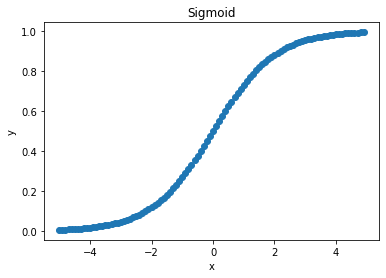

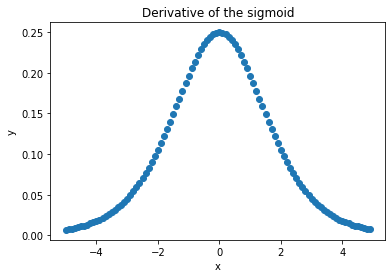

In [3]:
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, deriv = True)

# Plot the sigmoid
#plt.subplot(2,1,1)
plt.scatter(x, y)
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Plot the derivative of the sigmoid
#plt.subplot(2,1,2)
plt.scatter(x, y_deriv)
plt.title('Derivative of the sigmoid')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [0]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.cost_history = []

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Sigmoid Function
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Loss function || Entropy || Cost Function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    # Train the model
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.random.rand(X.shape[1], 1)

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)

            # Gradient
            gradient = np.dot(X.T, (h - y)) / y.size

            # Gradient Descent 
            self.theta -= self.lr * gradient
            self.cost_history.append(self.__loss(h, y))

            if(self.verbose == True and i % 100 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    # Print cost vs interations
    def plot_history(self):
      x = range(0, self.num_iter)
      plt.plot(x, self.cost_history)
      plt.xlabel("Iterations(per tens)")
      plt.ylabel("Training cost")
      plt.title("Cost for lr: " + str(learning_rate))
      plt.grid()
      plt.show()

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [0]:
# Read Data
ec = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Rlog/Enfermedad_Cardiaca.csv", sep='\t')
diabetes = pd.read_csv("/content/drive/My Drive/Cursos/TIA/Rlog/diabetes.csv", sep='\t')

In [0]:
# Tranform into np.array
ec_X = np.array(ec[["age", "sex",	"cp",	"trestbps",	"chol",	"fbs",	"restecg",	"thalach",	"exang",	"oldpeak",	"slope",	"ca",	"thal"]])
ec_y = np.array(ec["target"]).reshape(-1,1)

diabetes_X = np.array(diabetes[["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction",	"Age"]])
diabetes_y = np.array(diabetes["Outcome"]).reshape(-1,1)

In [0]:
# Regularization Function
def regularization(matrx):
  matrx = (matrx - np.mean(matrx)) / (np.std(matrx))
  # matrx = (matrx - np.mean(matrx)) / (np.max(matrx) - np.min(matrx))
  return matrx

In [0]:
# Normalization
ec_X = regularization(ec_X)

diabetes_X = regularization(diabetes_X)


In [0]:
# Hyperparamters 
iterations = 1000
learning_rate = 0.1

In [0]:
# Folds and Accuracy
from sklearn.model_selection import StratifiedKFold

def folds(X, y, model, print_accuracy=False):
  skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

  mean_accuracy = []


  for train_index, test_index in skfolds.split(X, y):
      clone_LR = model
      X_train_folds = X[train_index]
      y_train_folds = (y[train_index])
      X_test_fold = X[test_index]
      y_test_fold = (y[test_index])

      clone_LR.fit(X_train_folds, y_train_folds)
      y_pred = clone_LR.predict(X_test_fold)
      n_correct = sum(y_pred == y_test_fold)
      
      mean_accuracy.append(n_correct / len(y_pred))
      if print_accuracy:
        # Accuracy
        print("Accuracy: ", n_correct / len(y_pred))
        
  mean_accuracy = "{:.2f}".format(np.mean(mean_accuracy) * 100)
  return mean_accuracy

In [12]:
# EC
ec_LR = LogisticRegression(learning_rate, iterations)
folds(ec_X, ec_y, ec_LR, 1)

Accuracy:  [0.72277228]
Accuracy:  [0.69306931]
Accuracy:  [0.71287129]


'70.96'

In [13]:
# Diabetes
diabetes_LR = LogisticRegression(learning_rate, iterations)
folds(diabetes_X, diabetes_y, diabetes_LR, 1)

Accuracy:  [0.75390625]
Accuracy:  [0.76953125]
Accuracy:  [0.73828125]


'75.39'

In [0]:
# Experiment 1
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
iterations = [*range(500, 4000, 500)]

In [0]:
# EC
ec_history = []

for learning_rate in learning_rates:
  for iteration in iterations:
    ec_mean_accuracy = folds(ec_X, ec_y, LogisticRegression(learning_rate, iteration))
    ec_history.append([learning_rate, iteration, ec_mean_accuracy])


In [16]:
print("EC history")
print(" --------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | Accuracy     |")
print(" --------------------------------------------------")
for his in ec_history:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "%    |")
print(" --------------------------------------------------")


EC history
 --------------------------------------------------
| Tasa de Aprendizaje | Iteraciones | Accuracy     |
 --------------------------------------------------
|        0.01         |     500     | 60.73%    |
|        0.01         |     1000     | 64.36%    |
|        0.01         |     1500     | 67.99%    |
|        0.01         |     2000     | 66.34%    |
|        0.01         |     2500     | 68.98%    |
|        0.01         |     3000     | 66.67%    |
|        0.01         |     3500     | 67.99%    |
|        0.05         |     500     | 67.00%    |
|        0.05         |     1000     | 68.65%    |
|        0.05         |     1500     | 69.64%    |
|        0.05         |     2000     | 70.30%    |
|        0.05         |     2500     | 69.97%    |
|        0.05         |     3000     | 70.63%    |
|        0.05         |     3500     | 69.97%    |
|        0.1         |     500     | 68.98%    |
|        0.1         |     1000     | 70.30%    |
|        0.1         

In [0]:
# Diabetes
diabetes_history = []

for learning_rate in learning_rates:
  for iteration in iterations:
    diabetes_mean_accuracy = folds(diabetes_X, diabetes_y, LogisticRegression(learning_rate, iteration))
    diabetes_history.append([learning_rate, iteration, diabetes_mean_accuracy])


In [18]:
print("EC history")
print(" --------------------------------------------------")
print("| Tasa de Aprendizaje | Iteraciones | Accuracy     |")
print(" --------------------------------------------------")
for his in ec_history:  
  print("|        " + str(his[0]) +                "         |     " + str(his[1]) + "     | " + str(his[2]) + "%    |")
print(" --------------------------------------------------")

EC history
 --------------------------------------------------
| Tasa de Aprendizaje | Iteraciones | Accuracy     |
 --------------------------------------------------
|        0.01         |     500     | 60.73%    |
|        0.01         |     1000     | 64.36%    |
|        0.01         |     1500     | 67.99%    |
|        0.01         |     2000     | 66.34%    |
|        0.01         |     2500     | 68.98%    |
|        0.01         |     3000     | 66.67%    |
|        0.01         |     3500     | 67.99%    |
|        0.05         |     500     | 67.00%    |
|        0.05         |     1000     | 68.65%    |
|        0.05         |     1500     | 69.64%    |
|        0.05         |     2000     | 70.30%    |
|        0.05         |     2500     | 69.97%    |
|        0.05         |     3000     | 70.63%    |
|        0.05         |     3500     | 69.97%    |
|        0.1         |     500     | 68.98%    |
|        0.1         |     1000     | 70.30%    |
|        0.1         

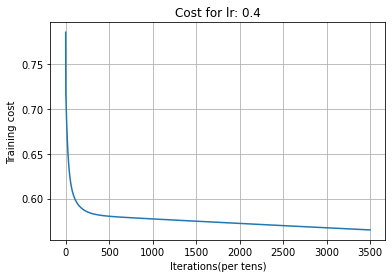

In [24]:
# Plot EC cost history
ec_model = LogisticRegression(0.4, 3500)
ec_model.fit(ec_X, ec_y)
ec_model.plot_history()

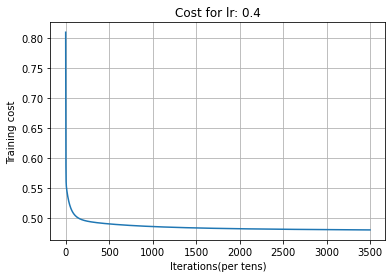

In [25]:
# Plot diabetes cost history
diabetes_model = LogisticRegression(0.4, 3500)
diabetes_model.fit(diabetes_X, diabetes_y)
diabetes_model.plot_history()